# Install the following packages

## datasets
pip install vega_datasets
## creating plots packages
pip install matplotlib

pip install seaborn

## install machine learning package
pip install sklearn

## Details on the available datasets
## https://python-data-science.readthedocs.io/en/latest/datasets.html
## https://github.com/jakevdp/vega_datasets

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [4]:
# See the available datasets:
from vega_datasets import data

print(f'{len(data.list_datasets())}')
data.list_datasets()



70


['7zip',
 'airports',
 'annual-precip',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2-concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare-dependencies',
 'flights-10k',
 'flights-200k',
 'flights-20k',
 'flights-2k',
 'flights-3m',
 'flights-5k',
 'flights-airport',
 'gapminder',
 'gapminder-health-income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa-electricity',
 'iris',
 'jobs',
 'la-riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal-2d',
 'obesity',
 'ohlc',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle-temps',
 'seattle-weather',
 'sf-temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment-across-industries',
 'uniform-2d',
 'us-10m',
 'us-employment',
 'us-state-capitals',
 'volcano',
 'weather',
 'weball26',
 'wheat',

In [5]:
dataset = data.seattle_weather()
dataset.describe()


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
dataset.head(5)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [8]:
# weather is categorical variable.
dataset.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [9]:
dataset.shape

(1461, 6)

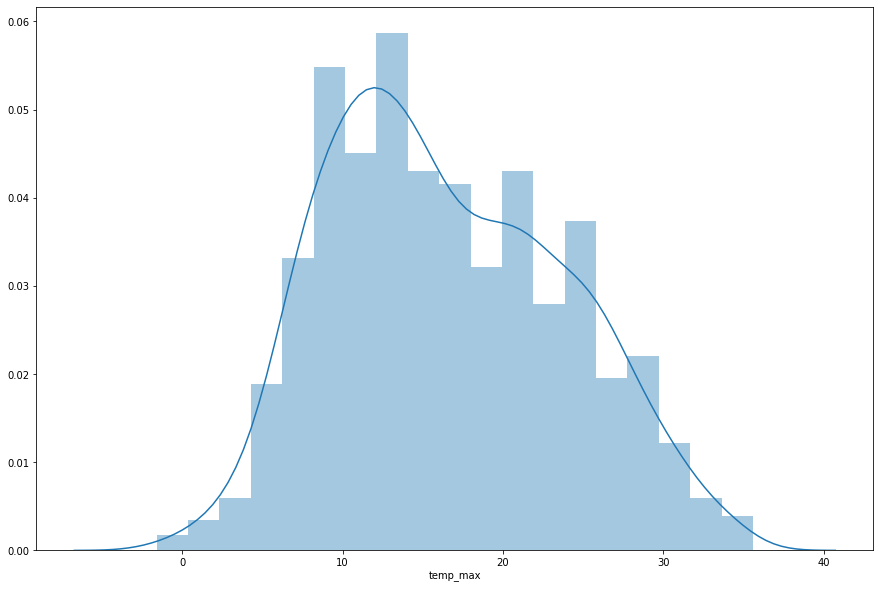

In [10]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['temp_max'])

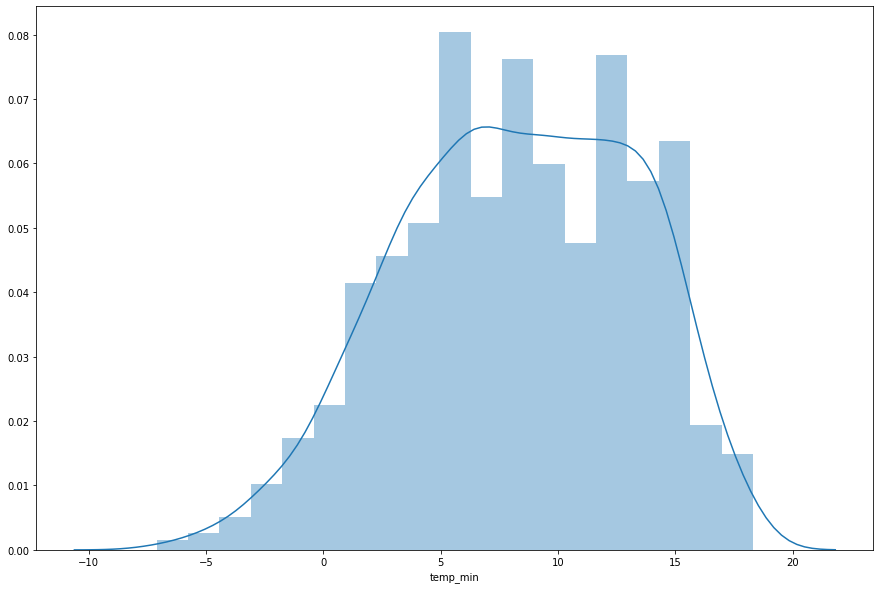

In [11]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['temp_min'])

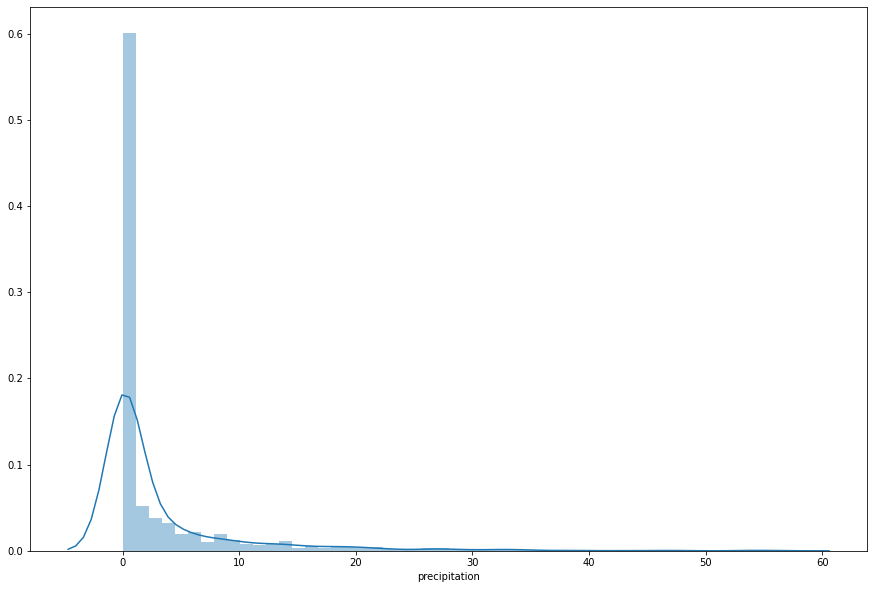

In [12]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['precipitation'])

# 1. We would like to predict the precipitation given a temp_min.
## We will use one variable linear regression.

In [13]:
# Divide the data into “attributes” and “labels”

X = dataset['temp_min'].values.reshape(-1,1)
y = dataset['precipitation'].values.reshape(-1,1)

In [17]:
# y

In [20]:
# X.shape

In [21]:
# Divide the data into training and testing partition 
# train => 80%
# test => 20%
# we use the following function that we imported above:
# from sklearn.model_selection import train_test_split 

print(f'X : {X.shape}, y : {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print (f'X_train: {X_train.shape}')
print (f'X_test: {X_test.shape}')

print (f'y_train: {y_train.shape}')
print (f'y_test: {y_test.shape}')

X : (1461, 1), y : (1461, 1)
X_train: (1168, 1)
X_test: (293, 1)
y_train: (1168, 1)
y_test: (293, 1)


In [ ]:
#Normalize the data

In [22]:
print('Before Normalization: ')
print(f'Train: max {X_train.max()}, min {X_train.min()}')
print(f'Test: max {X_test.max()}, min {X_test.min()}')

#Calculate mean and std for the training data. 
train_mean = X_train.mean()
train_std = X_train.std()

# normalize train and test data
X_train_nrom = (X_train - train_mean) / train_std
X_test_nrom = (X_test - train_mean) / train_std

print('*' * 20)
print('After Normalization: ')
print(f'Train: max {X_train_nrom.max()}, min {X_train_nrom.min()}')
print(f'Test: max {X_test_nrom.max()}, min {X_test_nrom.min()}')

Before Normalization: 
Train: max 18.3, min -7.1
Test: max 17.8, min -3.9
********************
After Normalization: 
Train: max 1.994842842177979, min -3.0145443788090223
Test: max 1.8962328575128804, min -2.3834404769523925


In [23]:
# We import LinearRegression from sklearn (we did this in the first line):
# from sklearn.linear_model import LinearRegression

# Then, we declare object of type LinearRegression()  
regressor = LinearRegression()  
# Then we fit the train exaples with labelings
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [24]:
#For retrieving the slope:
print(regressor.coef_)

[[-0.07610153]]


In [25]:
print(regressor.n_features_in_ )

1


In [26]:
# Predict the unseen examples (test dataset)
y_pred = regressor.predict(X_test)


In [30]:
# y_pred

In [31]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.0,2.925460
1,0.0,3.260307
2,8.4,3.092883
3,0.0,3.260307
4,0.0,3.305967
...,...,...
288,4.3,3.519052
289,0.0,3.305967
290,0.0,3.092883
291,2.0,3.557103


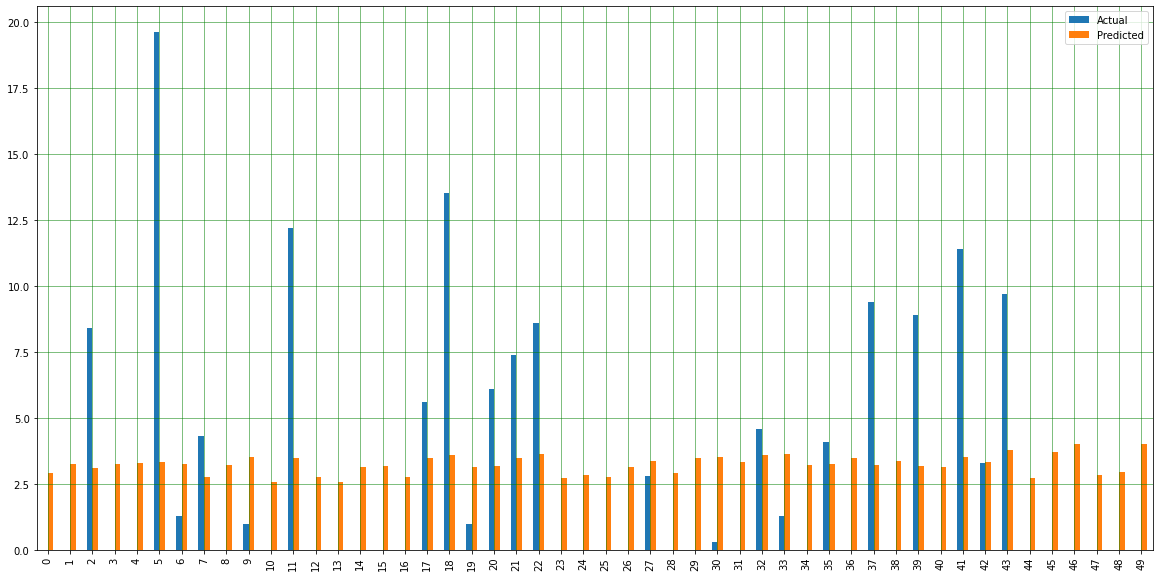

In [32]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

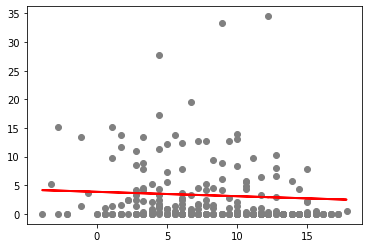

In [33]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [34]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  


Mean Squared Error: 23.58484133637294


# 2. Linear Regression with Multiple variables.

In [35]:
dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [36]:
dataset.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [37]:
dataset['weather_code'] = dataset.weather.astype("category").cat.codes

In [38]:
dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather,weather_code
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2


In [39]:
# Divide the data into “attributes” and “labels”
X = dataset[['temp_min',
            'temp_min',
            'wind',
            'weather_code']].values
y = dataset['precipitation'].values

In [40]:
# Divide the data into training and testing partition 
# train => 80%
# test. => 20%
# we use the following function that we imported above:
# from sklearn.model_selection import train_test_split 

print(f'X : {X.shape}, y : {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print (f'X_train: {X_train.shape}')
print (f'X_test: {X_test.shape}')

print (f'y_train: {y_train.shape}')
print (f'y_test: {y_test.shape}')

X : (1461, 4), y : (1461,)
X_train: (1168, 4)
X_test: (293, 4)
y_train: (1168,)
y_test: (293,)


In [42]:
# X_train.max(axis=0)

array([18.3, 18.3,  9.5,  4. ])

In [43]:
print('Before Normalization: ')
print(f'Train: max {X_train.max(axis=0)}, min {X_train.min(axis=0)}')
print(f'Test: max {X_test.max(axis=0)}, min {X_test.min(axis=0)}')

#Calculate mean and std for the training data. 
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)

# normalize train and test data
X_train_nrom = (X_train - train_mean) / train_std
X_test_nrom = (X_test - train_mean) / train_std

print('*' * 20)
print('After Normalization: ')
print(f'Train: max {X_train_nrom.max(axis=0)}, min {X_train_nrom.min(axis=0)}')
print(f'Test: max {X_test_nrom.max(axis=0)}, min {X_test_nrom.min(axis=0)}')

Before Normalization: 
Train: max [18.3 18.3  9.5  4. ], min [-7.1 -7.1  0.4  0. ]
Test: max [17.8 17.8  7.1  4. ], min [-3.9 -3.9  0.6  0. ]
********************
After Normalization: 
Train: max [1.99484284 1.99484284 4.24385542 0.95707832], min [-3.01454438 -3.01454438 -1.9579664  -1.86403833]
Test: max [1.89623286 1.89623286 2.60821011 0.95707832], min [-2.38344048 -2.38344048 -1.82166263 -1.86403833]


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
coeff_df = pd.DataFrame(regressor.coef_, 
                        ['temp_min','temp_min', 'wind', 'weather_code'], 
                        columns=['Coefficient'])  
coeff_df

,Coefficient
temp_min,0.005613
temp_min,0.005613
wind,1.470417
weather_code,-1.633768


In [46]:
y_pred = regressor.predict(X_test)


In [47]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(50)
df1

,Actual,Predicted
0,0.0,1.686953
1,0.0,-1.744398
2,8.4,5.534268
3,0.0,3.696146
4,0.0,-2.045217
5,19.6,9.173268
6,1.3,4.480281
7,4.3,4.848451
8,0.0,4.338852
9,1.0,8.559283


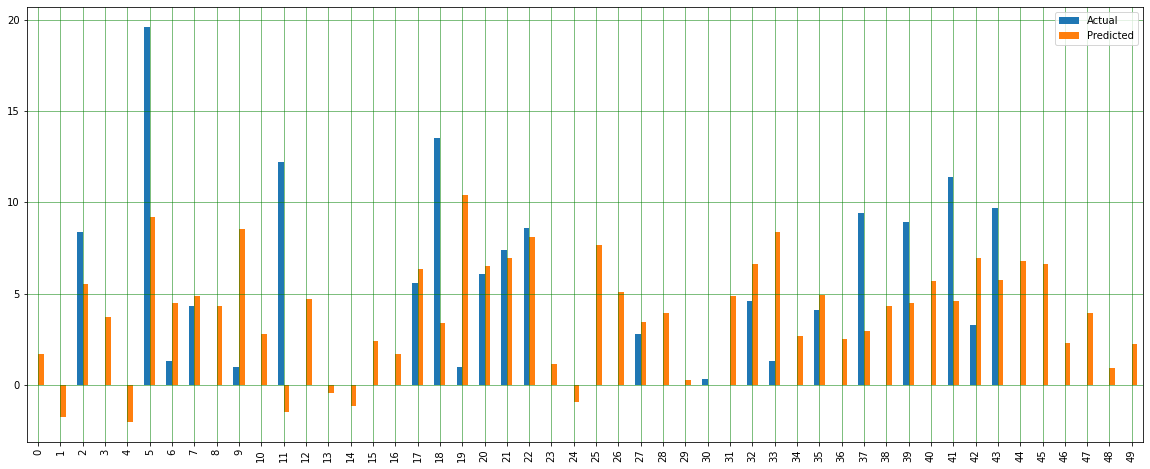

In [48]:
df1.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [49]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  


Mean Squared Error: 22.9803154086874
